In [ ]:
import pandas as pd
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")
df
#Using the Pandas library's functionalities to read data from a CSV file
#into a Pandas DataFrame, enabling us to examine, and visualize the data.

preprocessing techniques

1 - Check missing “NA” :


In [ ]:
missing_values = df.isna().sum()
print("\nTotal number of missing values in the dataset:", missing_values.sum())

#To begin cleaning and handling the data set, we should know the total number of missing values. 

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('students_adaptability_level_online_education.csv')


print("\nMissing Values:")
missing_values = df.isnull().sum()
missing_table = pd.DataFrame({'Variable': missing_values.index, 'Missing Values': missing_values.values})
display(missing_table)

#The previous code reads data from a CSV file, finds any missing values, 
#and creates a table that counts the number of missing values for each variable in the dataset.


Missing Values:


,Variable,Missing Values
0,Education Level,0
1,Institution Type,0
2,Gender,0
3,Age,0
4,Device,0
5,IT Student,0
6,Location,0
7,Financial Condition,0
8,Internet Type,0
9,Network Type,0


2 -Detect Outlier using mean method :

In [ ]:
# Extract the 'Age' column from the DataFrame
age_column = df['Age']
# Calculate the mean age
mean_age = age_column.mean()
# Calculate the absolute differences of each age from the mean
differences_from_mean = abs(age_column - mean_age)

# Find the index of the row with the largest difference from the mean
max_difference_index = differences_from_mean.idxmax()

# Remove the row with the largest difference from the mean
df_no_outlier = df.drop(max_difference_index)

# Print the DataFrame after removing the row with the largest difference from the mean
print("\nDataFrame after removing the row with the largest difference from the mean:")
df_no_outlier



DataFrame after removing the row with the largest difference from the mean:


,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,University,Private,Male,23,Tab,No,Town,Mid,Wifi,4G,Moderate
1,University,Private,Female,23,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
2,College,Public,Female,18,Mobile,No,Town,Mid,Wifi,4G,Moderate
3,School,Private,Female,11,Mobile,No,Town,Mid,Mobile Data,4G,Moderate
4,School,Private,Female,18,Mobile,No,Town,Poor,Mobile Data,3G,Low
...,...,...,...,...,...,...,...,...,...,...,...
1200,College,Private,Female,18,Mobile,No,Town,Mid,Wifi,4G,Low
1201,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Moderate
1202,School,Private,Male,11,Mobile,No,Town,Mid,Mobile Data,3G,Moderate
1203,College,Private,Female,18,Mobile,No,Rural,Mid,Wifi,4G,Low


3 -variable transformation: 

In [ ]:
#Import necessary libraries
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder for encoding categorical variables
from scipy import stats  # Import stats module from scipy for statistical operations

# Initialize a LabelEncoder object
le = LabelEncoder()

# Encode categorical variables to numerical labels
df['Flexibility Level'] = le.fit_transform(df['Flexibility Level'])  # Encode 'Flexibility Level'
df['Education Level'] = le.fit_transform(df['Education Level'])  # Encode 'Education Level'
df['Gender'] = le.fit_transform(df['Gender'])  # Encode 'Gender'
df['Location'] = le.fit_transform(df['Location'])  # Encode 'Location'
df['Internet Type'] = le.fit_transform(df['Internet Type'])  # Encode 'Internet Type'

# The categorical variables have been transformed into numerical labels in the DataFrame 'df'.

,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,2,Private,1,23,Tab,No,1,Mid,1,4G,2
1,2,Private,0,23,Mobile,No,1,Mid,0,4G,2
2,0,Public,0,18,Mobile,No,1,Mid,1,4G,2
3,1,Private,0,11,Mobile,No,1,Mid,0,4G,2
4,1,Private,0,18,Mobile,No,1,Poor,0,3G,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,0,Private,0,18,Mobile,No,1,Mid,1,4G,1
1201,0,Private,0,18,Mobile,No,0,Mid,1,4G,2
1202,1,Private,1,11,Mobile,No,1,Mid,0,3G,2
1203,0,Private,0,18,Mobile,No,0,Mid,1,4G,1


4 -Normalization :

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Extract columns to normalize
columns_to_normalize = ['Age']
data_to_normalize = df[columns_to_normalize]

# Min-Max scaling for selected columns
minmax_scaler = MinMaxScaler()
normalized_data_minmax = minmax_scaler.fit_transform(data_to_normalize)

# Replace the normalized values in the original DataFrame
df[columns_to_normalize] = normalized_data_minmax

print("Min-Max scaled data :")
df

Min-Max scaled data :


,Education Level,Institution Type,Gender,Age,Device,IT Student,Location,Financial Condition,Internet Type,Network Type,Flexibility Level
0,2,Private,1,0.777778,Tab,No,1,Mid,1,4G,2
1,2,Private,0,0.777778,Mobile,No,1,Mid,0,4G,2
2,0,Public,0,0.500000,Mobile,No,1,Mid,1,4G,2
3,1,Private,0,0.111111,Mobile,No,1,Mid,0,4G,2
4,1,Private,0,0.500000,Mobile,No,1,Poor,0,3G,1
...,...,...,...,...,...,...,...,...,...,...,...
1200,0,Private,0,0.500000,Mobile,No,1,Mid,1,4G,1
1201,0,Private,0,0.500000,Mobile,No,0,Mid,1,4G,2
1202,1,Private,1,0.111111,Mobile,No,1,Mid,0,3G,2
1203,0,Private,0,0.500000,Mobile,No,0,Mid,1,4G,1


5 -Discretization :

In [ ]:
import pandas as pd
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")
# Discretization for a specific column ('Age')
column_to_discretize = 'Age'
num_bins = 3 # Number of bins

# Perform discretization using the cut function
df['discretized_' + column_to_discretize] = pd.cut(df[column_to_discretize], bins=num_bins, labels=False)

df[['Age', 'discretized_Age']] # Displaying relevant columns

,Age,discretized_Age
0,23,2
1,23,2
2,18,1
3,11,0
4,18,1
...,...,...
1200,18,1
1201,18,1
1202,11,0
1203,18,1


6 -Chi squared :

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")
# Create a contingency table
contingency_table = pd.crosstab(df['Flexibility Level'], df['Education Level'])
print("Contingency Table:")
print(contingency_table)
# Perform the chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
# Print the results of the chi-square test
print("\nChi-Square Statistic:", chi2_stat)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:")
print(expected) 

Contingency Table:
Education Level    College  School  University
Flexibility Level                             
High                     3      47          50
Low                    120     182         178
Moderate                96     301         228

Chi-Square Statistic: 38.68597806832386
Degrees of Freedom: 4
Expected Frequencies:
[[ 18.17427386  43.98340249  37.84232365]
 [ 87.23651452 211.12033195 181.64315353]
 [113.58921162 274.89626556 236.51452282]]


7 -Feature selection - Recursive Feature Elimination

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder

# Load the dataset using pandas
data = pd.read_csv('students_adaptability_level_online_education.csv')

# Identify categorical columns
categorical_columns = ['Flexibility Level', 'Education Level']

# One-hot encode categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data[categorical_columns])

# Define target variable
y = data['Flexibility Level']  # Assuming 'Flexibility Level' is the target variable

# Use RFE with Logistic Regression as the underlying model
model = LogisticRegression()
rfe = RFE(model, n_features_to_select=2)  # Select top 2 features
X_new = rfe.fit_transform(X_encoded, y)
# Display the selected features
selected_features = [i for i, mask in enumerate(rfe.support_) if mask]
print("Selected Features:", selected_features)



Selected Features: [1, 2]


8 -Feature selection - Correlation-based Feature Selection (Filter Method)

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import OneHotEncoder

# Load the dataset using pandas
data = pd.read_csv('students_adaptability_level_online_education.csv')

# Identify categorical columns
categorical_columns = ['Flexibility Level', 'Education Level']

# One-hot encode categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data[categorical_columns])

# Define target variable
y = data['Flexibility Level']  # Assuming 'Flexibility Level' is the target variable

# Convert the sparse matrix into a dense array
X_dense = X_encoded.toarray()

# Use SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=2) # Select top 2 features
X_new = selector.fit_transform(X_dense, y)

# Display the selected features
selected_features = data.columns[selector.get_support(indices=True)]
print("Selected Features:", selected_features)


Selected Features: Index(['Institution Type', 'Gender'], dtype='object')


9 -Correlation Coefficient : we dont have 2 types of numerical attribute

statistical summaries :

In [ ]:
import pandas as pd
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")
df.describe()


,Age
count,1205.000000
mean,17.065560
std,5.830369
min,9.000000
25%,11.000000
50%,18.000000
75%,23.000000
max,27.000000


In [ ]:
var_data = df["Age"] . var()
print(var_data)

33.993206600405294


In [ ]:
# Import numpy for mathematical operations
 import numpy as np
 # Import mode function from scipy.stats for finding mode
from scipy.stats import mode
import pandas as pd
# Read the CSV file into a pandas DataFrame
df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")
# Calculate the median of the 'Age' column
median_value = df["Age"].median()
print("Median:", median_value)

# Calculate the mode of the 'Age' column

mode_result = df["Age"].mode()
print("Mode:", mode_result)

Median: 18.0
Mode: 0    23
Name: Age, dtype: int64


graphs and tables show variables distribution: 

- plot histogram :

<AxesSubplot:ylabel='Frequency'>

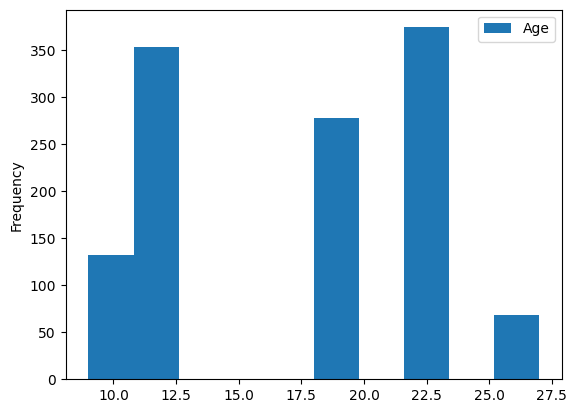

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("students_adaptability_level_online_education.csv",sep=",")

df.plot.hist()
#The code creates a combined histogram plot for all numerical columns

- pie chart :

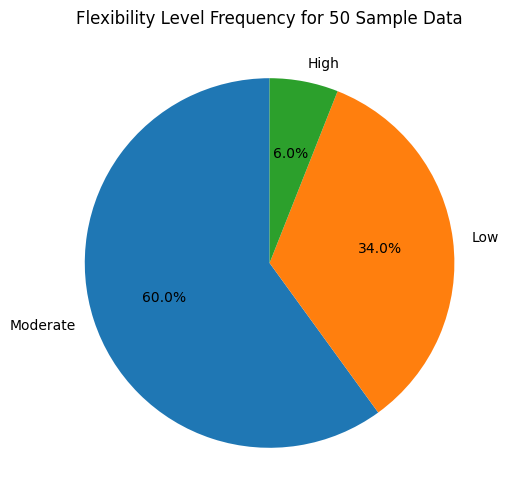

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")


sample_df = df.sample(n=50, random_state=1)


category_frequency = sample_df['Flexibility Level'].value_counts(normalize=True) * 100


category_frequency.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)

# Display the plot
plt.title('Flexibility Level Frequency for 50 Sample Data')
plt.ylabel('') # Hide y-axis Label
plt.show()
#to create a pie chart to visualize the frequency distribution of the "Flexibility Level" 
#variable in a randomly sampled subset of the dataset.

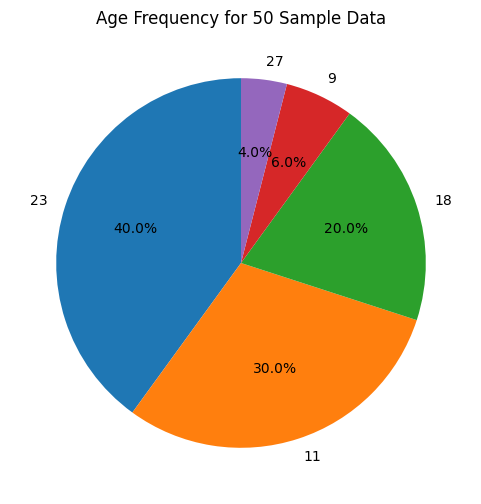

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")


sample_df = df.sample(n=50, random_state=1)


category_frequency = sample_df['Age'].value_counts(normalize=True) * 100


category_frequency.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)


plt.title('Age Frequency for 50 Sample Data')
plt.ylabel('') # Hide y-axis Label
plt.show()
#for creating a pie chart to visualize the frequency distribution of ages in a randomly sampled of subset of the dataset.


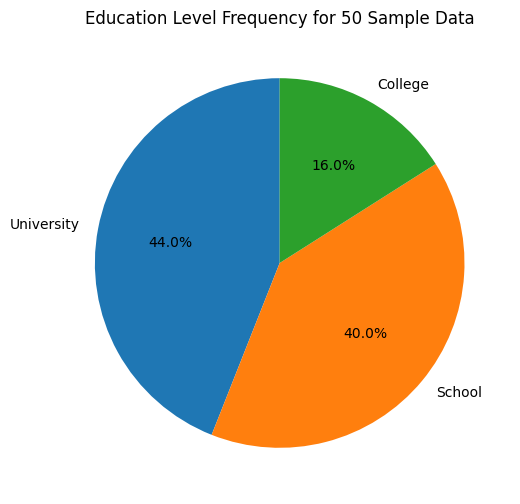

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")


sample_df = df.sample(n=50, random_state=1)


category_frequency = sample_df['Education Level'].value_counts(normalize=True) * 100


category_frequency.plot.pie(autopct='%1.1f%%', figsize=(6, 6), startangle=90)


plt.title('Education Level Frequency for 50 Sample Data')
plt.ylabel('') # Hide y-axis Label
plt.show()
#this code provides a visual representation of the distribution of education levels 
#in a sample of 50 data points from the dataset.

- bar chart :

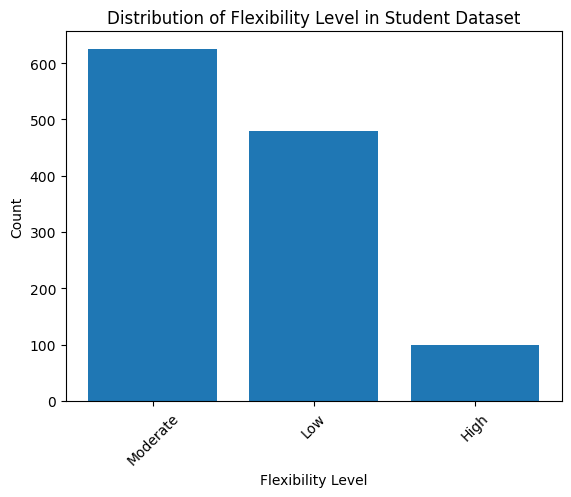

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")



category_counts = df['Flexibility Level'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Distribution of Flexibility Level in Student Dataset')
plt.xlabel('Flexibility Level')
plt.ylabel('Count')
plt.xticks(rotation=45)  
plt.show()
#to create a bar plot to visualize the distribution of the "Flexibility Level" variable in the student dataset

- pair plot :

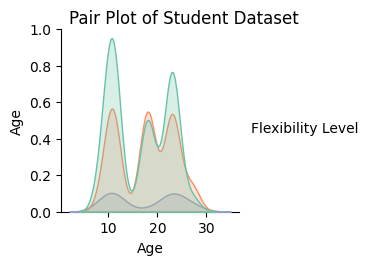

In [ ]:
import piplite
await piplite. install('seaborn')
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset
df = pd.read_csv("students_adaptability_level_online_education.csv")


sns.pairplot(df, hue='Flexibility Level', palette='Set2')
plt.suptitle('Pair Plot of Student Dataset', y=1.02)
plt.show()
#to generate a pair plot to visualize the relationships between different numerical variables in the student dataset,
#with data points colored by the "Flexibility Level" variable

- Boxplot :

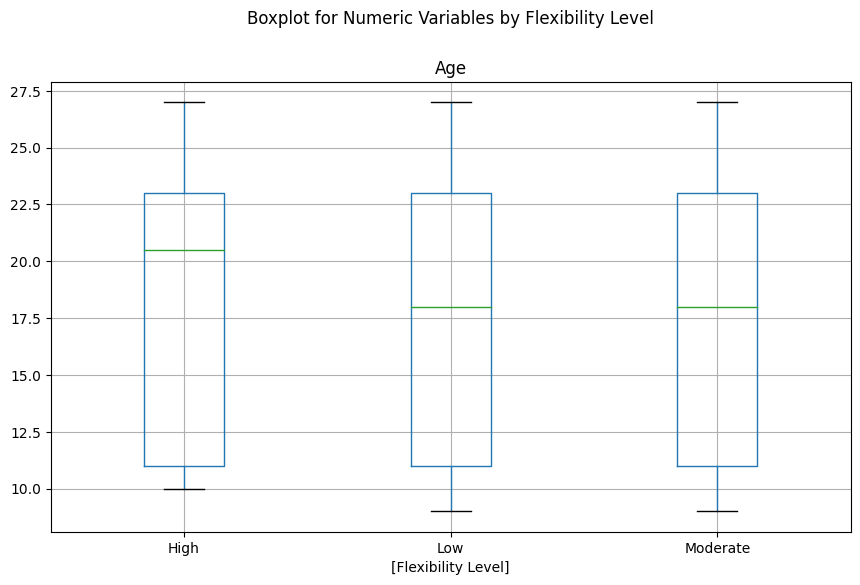

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
iris = pd.read_csv('students_adaptability_level_online_education.csv')


iris.boxplot(by='Flexibility Level', figsize=(10, 6))
plt.suptitle('Boxplot for Numeric Variables by Flexibility Level', y=1.02)
plt.show()
#to creat a graphical illustration of how the dataset's numerical variables are distributed across various degrees of flexibility.
#The distribution of a numerical variable within each flexibility level category is shown by each boxplot.

- Scatter plot :

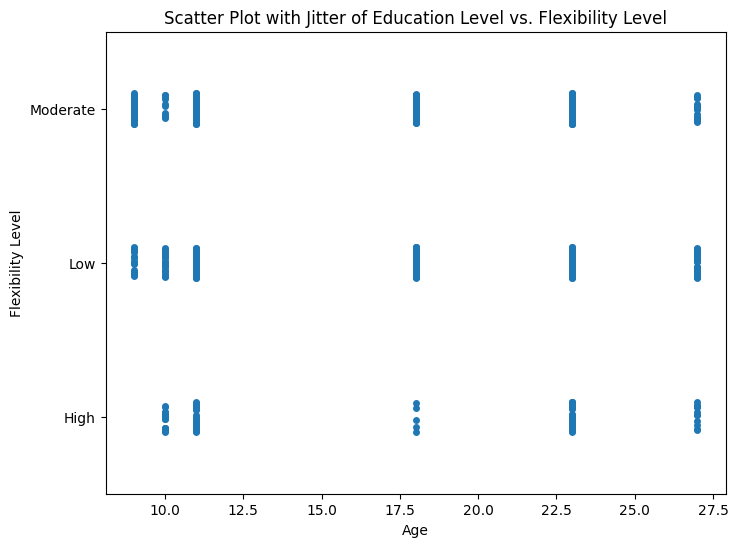

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load your dataset
iris = pd.read_csv('students_adaptability_level_online_education.csv')


plt.figure(figsize=(8, 6))
sns.stripplot(x='Age', y='Flexibility Level', data=iris, jitter=True, dodge=True)
plt.title('Scatter Plot with Jitter of Education Level vs. Flexibility Level')
plt.xlabel('Age')
plt.ylabel('Flexibility Level')
plt.show()
# to show a visual representation of the relationship between age and flexibility level in the dataset

- Bar plot :

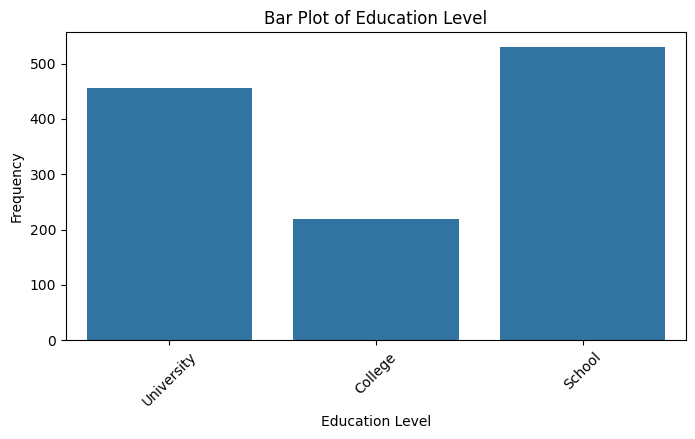

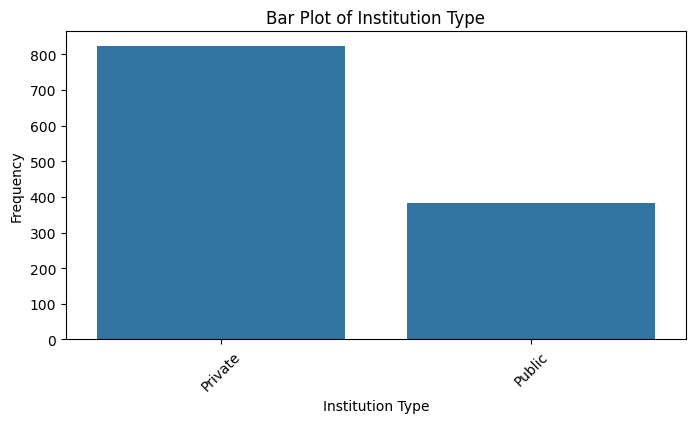

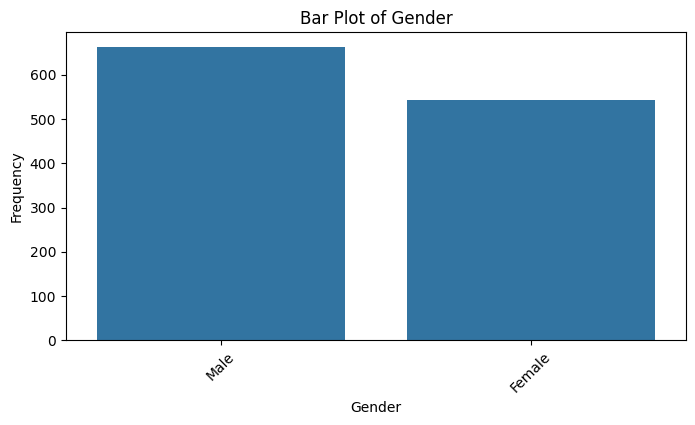

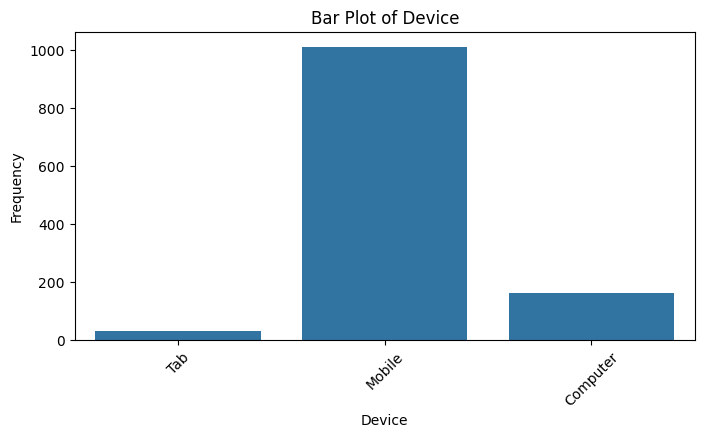

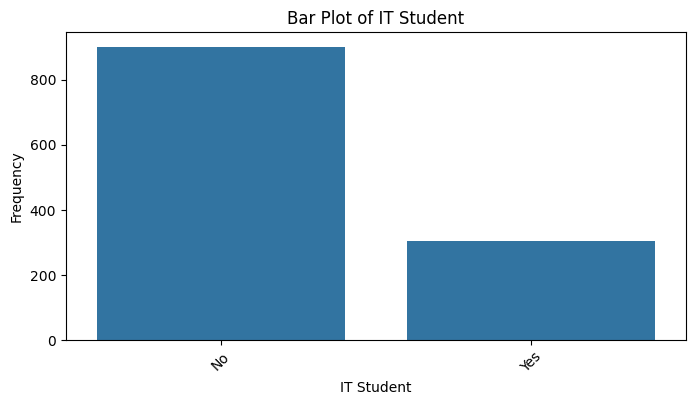

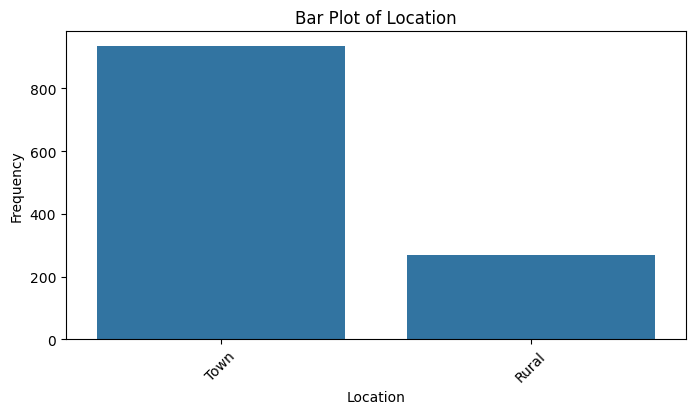

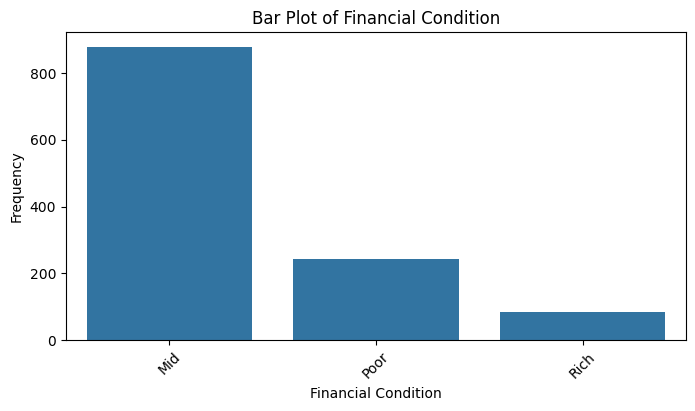

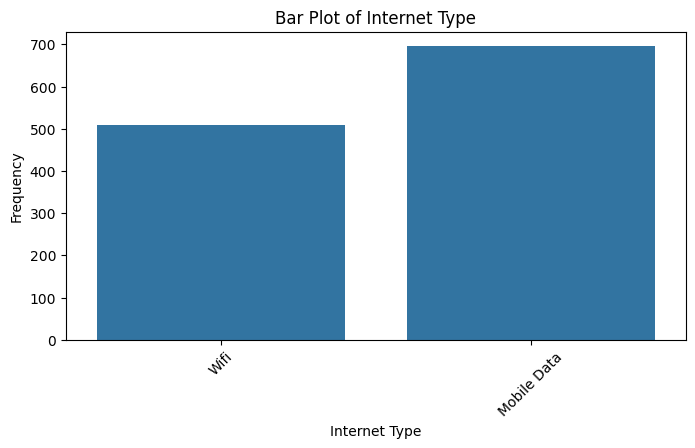

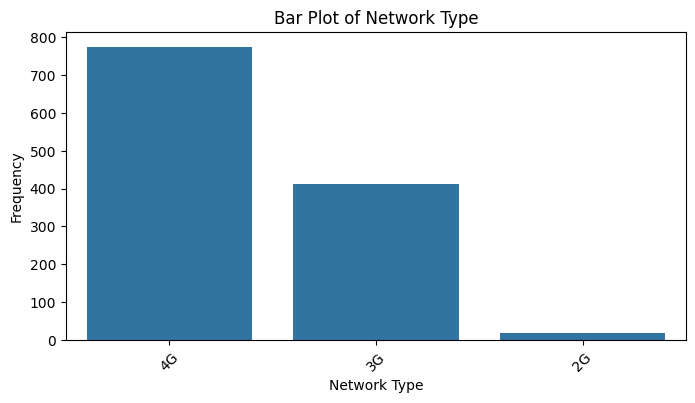

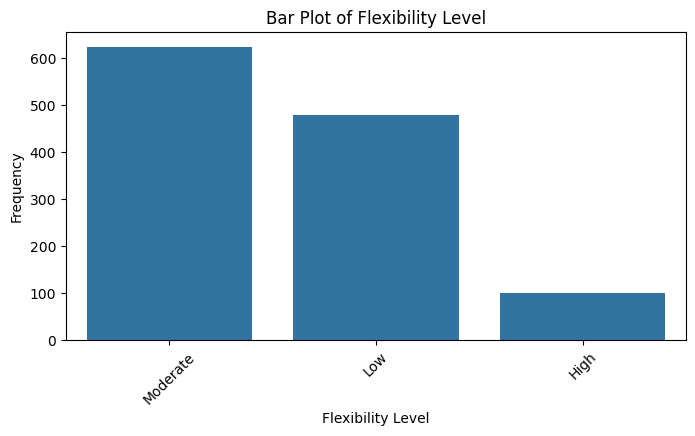

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('students_adaptability_level_online_education.csv')


# Bar plots for categorical variables
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=column, data=df)
    plt.title(f"Bar Plot of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()
#generates bar charts for every dataset's category variable.